Feature importance ranking


1.smoker(0.604956)
2.bmi(0.198473)
3.age(0.134405)
4.children(0.027569)
5.region(0.022917)
6.sex(0.011680)


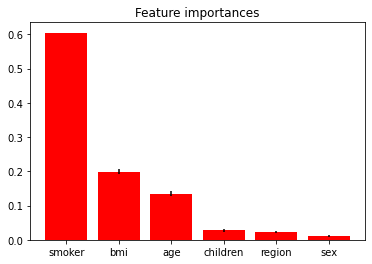

Root Mean Square Error test =  0.3660345648115991
Explain variance score = 0.87
[18:02:52] WARNING: d:\bld\xgboost-split_1637426510059\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test =  0.36369982079197066
Explain variance score = 0.88
Root Mean Square Error test =  0.4799803282457852
Explain variance score = 0.78
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn.metrics
import warnings


warnings.filterwarnings('ignore')

#load data
df = pd.read_csv('D:\Data Mining\PROJECT\insurance.csv')
df = df.dropna()

#general information
df.describe()

#Feature importance 
#transform categorical data
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df['sex'] = le_sex.fit_transform(df['sex'])
df['smoker'] = le_smoker.fit_transform(df['smoker'])
df['region'] = le_region.fit_transform(df['region'])

variables = ['sex','smoker','region','age','bmi','children']

X = df[variables]
sc = StandardScaler()
X = sc.fit_transform(X) 
Y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#train model
regressor = ExtraTreesRegressor(n_estimators = 200)
regressor.fit(X_train,y_train)

#prediction and evaluation
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('Feature importance ranking\n\n')
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.show()

data = pd.read_csv('D:\Data Mining\PROJECT\insurance.csv')

clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)



from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#CatBoostRegression
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# fit the model on the whole dataset
model = CatBoostRegressor(verbose=0, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import sklearn.metrics as sm
import math
print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,y_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

#XGBRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder


xgb = XGBRegressor(learning_rate=0.01,
                       n_estimators=1000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)


xgb.fit(X_train, y_train, verbose=False)
pred_xgb = xgb.predict(X_test)

import sklearn.metrics as sm
import math
print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,pred_xgb)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_xgb), 2))

from sklearn.linear_model import ElasticNetCV
alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(X_train, y_train.ravel())
ela_pred=elasticmod.predict(X_test)
print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,ela_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, ela_pred), 2))

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

y=y_train.ravel()

#Lightgbm
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test.ravel())],
        eval_metric='l1',
        early_stopping_rounds=1000)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,y_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import linear_model

prams = {'alpha':[1e-10,1e-5,1e-3,1e-2,0,1,3,5,10,15,20,30,40,50,55,100]}
lasso = GridSearchCV(linear_model.Lasso(),prams,scoring='neg_mean_squared_error',cv=5)
lasso.fit(X_train,y_train)

lasso.best_params_

la = linear_model.Lasso(alpha=0.001)
la.fit(X_train,y_train)
pred_la = la.predict(X_test)
print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,pred_la)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_la), 2))

#Ridge Regressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

reg_ridge.best_estimator_, reg_ridge.best_score_

ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train, y_train.ravel())
pred_ridge = ridge.predict(X_test)

print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,pred_ridge)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_ridge), 2))

#Voting Regressor
from sklearn.ensemble import VotingRegressor
vote_mod = VotingRegressor([('Elastic', elastic_cv), ('CatBoostRegressor',model),
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(X_train, y_train.ravel())
vote_pred=vote.predict(X_test)
print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,vote_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, vote_pred), 2))

#Stacking Regressor
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[model, xgb,vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(X_train, y_train.ravel())
stacking_pred=stack_mod.predict(X_test)
print("Root Mean Square Error test = ",math.sqrt(sm.mean_squared_error(y_test,stacking_pred)))
print("Explain variance score =", round(sm.explained_variance_score(y_test, stacking_pred), 2))

import pickle

pickle.dump(stack_mod, open('model9.pkl','wb'))

